<div style="font-weight: bold; color:#5D8AA8" align="center">
    <div style="font-size: xx-large">Métodos Funcionales en Aprendizaje Automático</div><br>
    <div style="font-size: x-large; color:gray">Examen 02 - Manifold Learning</div><br>
    <div style="font-size: large">Autor:</div>Antonio Coín Castro<br></div><hr>
</div>

**Configuración Inicial**

In [1]:
%%html
<style>
    .qst {background-color: #b1cee3; padding:10px; border-radius: 5px; border: solid 2px #5D8AA8;}
    .qst:before {font-weight: bold; content:"Preguntas"; display: block; margin: 0px 10px 10px 10px;}
    h1, h2, h3 {color: #5D8AA8;}
    .text_cell_render p {text-align: justify; text-justify: inter-word;}
</style>

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors

from mpl_toolkits.mplot3d import Axes3D
Axes3D

matplotlib.rc('figure', figsize=(15, 5))

seed = 123
my_cmap = plt.cm.Spectral

# Directrices generales

Este notebook contiene el enunciado de la segunda parte del examen de *Método Funcionales en Aprendizaje Automático*.

Por favor, lee con cuidado cada uno de los tres ejercicios así como las preguntas que en ellos se formulan, y explica de manera concisa cada asunción y conclusión que hagas.

Debéis entregar un **informe** (que puede realizarse directamente sobre el notebook) y el **código** implementado para completar los ejercicios, así como las **referencias** consultadas en caso de necesidad. También se debe entregar el **código de honor firmado**. Todo esto se enviará vía Moodle en un *.zip*.

# Ejercicio 1 (3.5 puntos)

<img src="grafo.png">

<div class="qst">

* Para el grafo anterior, calcula $f^\top L f$, siendo $L$ el laplaciano del grafo no normalizado ($L = D- W$) y si $f$ se define como:
    $f(x_1) = 1, f(x_2) = 2, f(x_3) = 6, f(x_4) = 5, f(x_5) = 4$.
    
* Calcula $f^\top L f$ si cambiamos el valor de los pesos $w_1=1$ y $w_3=10$. ¿Cambia el resultado? ¿Por qué?
    
* Define una función $f$ que minimice $f^\top L f$. ¿Existe más de una solución que minimice $f^\top L f$ , sin tener en cuenta múltiplos de la $f$ definida (de manera más formal, que sea linealmente independiente a la solución dada)? 

</div>

En primer lugar debemos definir la matriz de pesos $W$, simplemente mirando los pesos y las conexiones en el grafo. Después definimos la matriz D, que es una matriz diagonal que en cada posición contiene la suma de la fila correspondiente de $W$. Finalmente, definimos $L=D-W$, definimos $f$, y calculamos $f^TLf$.

In [4]:
# Weight matrix
W = np.array([
    [0, 10, 4, 0, 0],
    [10, 0, 1, 0, 0],
    [4, 1, 0, 0, 0],
    [0, 0, 0, 0, 3],
    [0, 0, 0, 3, 0]
])

# Degree matrix
D = np.diag(W.sum(axis=1))

# Unnormalized laplacian
L = D - W

# Eigenvector
f = np.array([1, 2, 6, 5, 4])

print(f"Resultado: {f@L@f}")

Resultado: 129


Cambiamos el valor de los pesos y rehacemos los cálculos.

In [5]:
W[0, 1] = W[1, 0] = 1
W[0, 2] = W[2, 0] = 10

D = np.diag(W.sum(axis=1))
L = D - W

print(f"Resultado: {f@L@f}")

Resultado: 270


Denotemos por conveniencia $f=(f_1, f_2, f_3, f_4, f_5)^T$. Observamos que cambiando los pesos obtenemos un resultado mayor de $f^TLf$, y para explicarlo recordamos la fórmula probada en clase:

$$
f^TLf = \frac{1}{2}\sum_{i,j} w_{ij}(f_i - f_j)^2.
$$

Como hemos decrementado los pesos $w_{12}=w_{21}$, ahora la diferencia entre $f_1$ y $f_2$ influye bastante menos en el cómputo, pero como esta diferencia ya de por sí era pequeña ($2-1=1$), no decrementa demasiado la cuenta total. Sin embargo, como hemos aumentado considerablemente los pesos $w_{13}=w_{31}$, ahora la diferencia entre $f_3$ y $f_1$ contribuye con más fuerza que antes a la suma. Como justamente esta diferencia ($6-1=5$) es la mayor entre cualesquiera dos componentes de $f$ (y además se ve elevada al cuadrado), el resultado final de la suma aumenta su valor, pasando de 129 a 270.



---

Pasamos ahora a la última pregunta. Antes de nada, sabemos que $L$ es semidefinida positiva (por ejemplo, viendo la fórmula de la pregunta anterior), por lo que siempre tendremos $f^TLf\geq 0$ sea quien sea $f$, e idealmente buscamos vectores que consigan el valor mínimo posible, es decir, $0$. Queremos minimizar entonces la función

$$
\Psi(f)=f^TLf, \quad f \in \mathbb R^5,
$$

por lo que derivando e igualando a cero tenemos

$$
\nabla \Psi(f)=2Lf=0\implies Lf=0,
$$

es decir, $f\in \ker(L)$. Podríamos calcular el núcleo de $L$ manualmente ya que se trata de un ejemplo pequeño, pero aprovechamos la función `null_space` de `scipy` para hacerlo.

In [6]:
from scipy.linalg import null_space
ker_L = null_space(L)
ker_L

array([[ 0.57735027,  0.        ],
       [ 0.57735027,  0.        ],
       [ 0.57735027,  0.        ],
       [-0.        ,  0.70710678],
       [-0.        ,  0.70710678]])

También podríamos haber usado la librería `sympy` de cálculo simbólico para calcular el subespacio nulo.

In [7]:
from sympy import Matrix
LL = Matrix(L)
LL.nullspace()

[Matrix([
 [1],
 [1],
 [1],
 [0],
 [0]]),
 Matrix([
 [0],
 [0],
 [0],
 [1],
 [1]])]

Extraemos los dos vectores que conforman una base del núcleo de $L$, y comprobamos el valor de $\Psi$ que obtienen.

In [8]:
f1 = ker_L[:, 0]
f2 = ker_L[:, 1]

print(f"Resultado: {f1@L@f1}")
print(f"Resultado: {f2@L@f2}")

Resultado: 3.8459253727671405e-16
Resultado: 0.0


Como vemos, hemos obtenido **dos soluciones linealmente independientes** $f_1$ y $f_2$ (además de ser l.i. son también perpendiculares), y se comprueba que ambas obtienen el valor mínimo de $0$ en la función $\Psi$. Eligiendo constantes de normalización convenientes, se trata de los vectores

$$
f_1 = (1, 1, 1, 0, 0)^T \quad \text{y} \quad f_2 = (0, 0, 0, 1, 1)^T.
$$

Además, recordando que $Lf_1=Lf_2=0$, tenemos que para todo $\alpha, \beta \in \mathbb R$ el vector $f=\alpha f_1 + \beta f_2$ es un mínimo de $\Psi$, pues verifica 

$$\Psi(f)=\alpha^2 f_1^TLf_1 + \beta^2 f_2^TLf_2 + 2\alpha\beta f_1^TLf_2=0.$$

Además, visto el procedimiento seguido para llegar aquí, cualquier mínimo de $\Psi$ es necesariamente de esta forma. En particular, no existen más de dos vectores linealmente independientes que minimicen $\Psi$.

# Ejercicio 2 (3.5 puntos)

<div class="qst">

* Realiza una reducción de dimensión adecuada para el conjunto de datos `X` de manera que en el embedding obtenido se separen de la mejor manera posible las dos clases que contiene, cuyas etiquetas se encuentran definidas en `y`.          
    
* ¿Con qué método de reducción de dimensión obtienes un mejor resultado? ¿Por qué crees que este método es adecuado para resolver el problema planteado?          

* Explica brevemente qué métodos has probado hasta llegar al resultado final.          
    
</div>

En primer lugar definimos una función para mostrar el embedding obtenido cuando se trate de una reducción a 2 dimensiones. He decidido que el criterio para comprobar cómo de buena es la separación, además de una inspección visual, será el *accuracy* que proporcione un clasificador lineal, en concreto un SVM lineal. Se añade la opción de mostrar la frontera de clasificación en el plot.

In [9]:
def plot_embedding(clf, X, y, title=None, ax=None):
    acc = clf.score(X, y)
    w, b = clf.coef_[0], clf.intercept_[0]

    xmin, xmax = np.min(X[:, 0]), np.max(X[:, 0])
    ymin, ymax = np.min(X[:, 1]), np.max(X[:, 1])
    delta_x = (xmax - xmin)/10
    delta_y = (ymax - ymin)/10
    x = np.array([xmin - delta_x, xmax + delta_x])

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(7, 5))

    ax.set_ylim(ymin - delta_y, ymax + delta_y)
    ax.set_title(title)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=my_cmap)
    ax.plot(x, (-b - w[0]*x)/w[1],
            color="green", label=f"Acc: {acc}")
    ax.legend()

    return ax

Antes de nada, estandarizamos los datos a media 0 y varianza 1. También guardamos la matriz de distancias, que nos será últil posteriormente como base para seleccionar algunos parámetros.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

data = np.loadtxt('data.txt')
X = data[:, :-1]
y = data[:, -1]
N, M = X.shape

# Standardize data
X = StandardScaler().fit_transform(X)

# Get distance matrix
dist = euclidean_distances(X)

print(f"X: {N} datos de dimensión {M}")

X: 100 datos de dimensión 12


Intentaremos conseguir un buen embedding tanto en 2D como en 3D, entre otras cosas para poder visualizar los datos. No se reduce hasta 1 dimensión porque tras una pequeña serie de pruebas he comprobado que el conjunto es relativamente difícil de separar, por lo que es preferible dejar más grados de libertad, y no parece a priori que los puntos se encuentren en una variedad de dimensión 1.

La estrategia que seguimos es ir probando algunos de los métodos que hemos visto en clase, siguiendo un enfoque de *cross-validation*: probamos diferentes combinaciones de parámetros, algunos de ellos elegidos por "fuerza bruta" buscando en un espacio logarítmico amplio, y otros seleccionados con criterios heurísticos que sabemos que suelen funcionar, como por ejemplo la mediana o el máximo de las distancias de los puntos originales.

## Isomap, KPCA y LLE

Comenzamos comparando Isomap, KPCA y LLE. Como estos algoritmos tienen un método `transform` en Sklearn, podemos aprovechar y ponerlos en un Pipeline para automatizar un poco más el proceso de búsqueda.

En el caso de LLE los parámetros que variamos son el número de vecinos entre 5 y 50 de 5 en 5, y la constante de regularización entre $10^{-3}$ y $10^{-1}$ en escala logarítmica. Para KPCA, fijamos el kernel RBF y vamos probando distintos valores de $\sigma$, mezclando criterios los heurísticos que comentábamos antes con el valor por defecto de Sklearn y algún otro extra. Para Isomap únicamente variamos el número de vecinos al igual que en LLE.

Para los embeddings en 2 dimensiones mostramos una gráfica que ayude a inspeccionar visualmente el resultado, y por simplicidad para los de 3 dimensiones mostramos simplemente el *accuracy* del SVM lineal, que creemos que es un buen indicativo de la separabilidad de los conjuntos.


---> Embedding to 2 dimensions <---


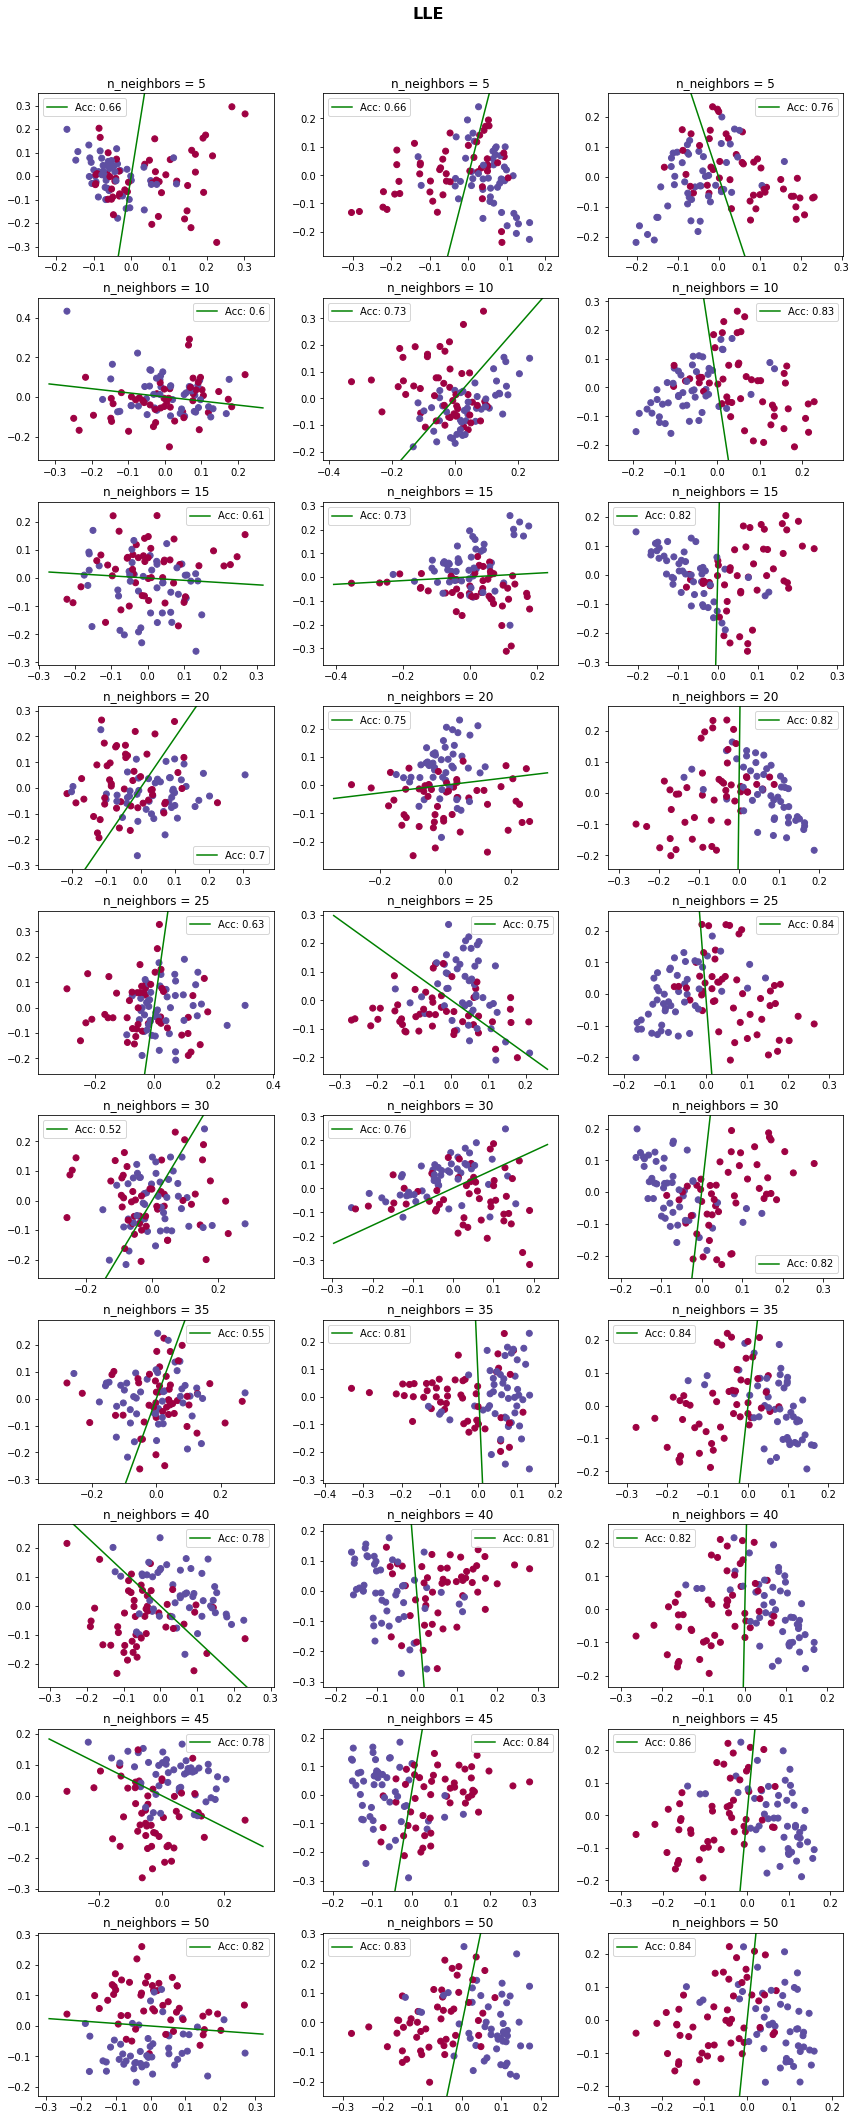

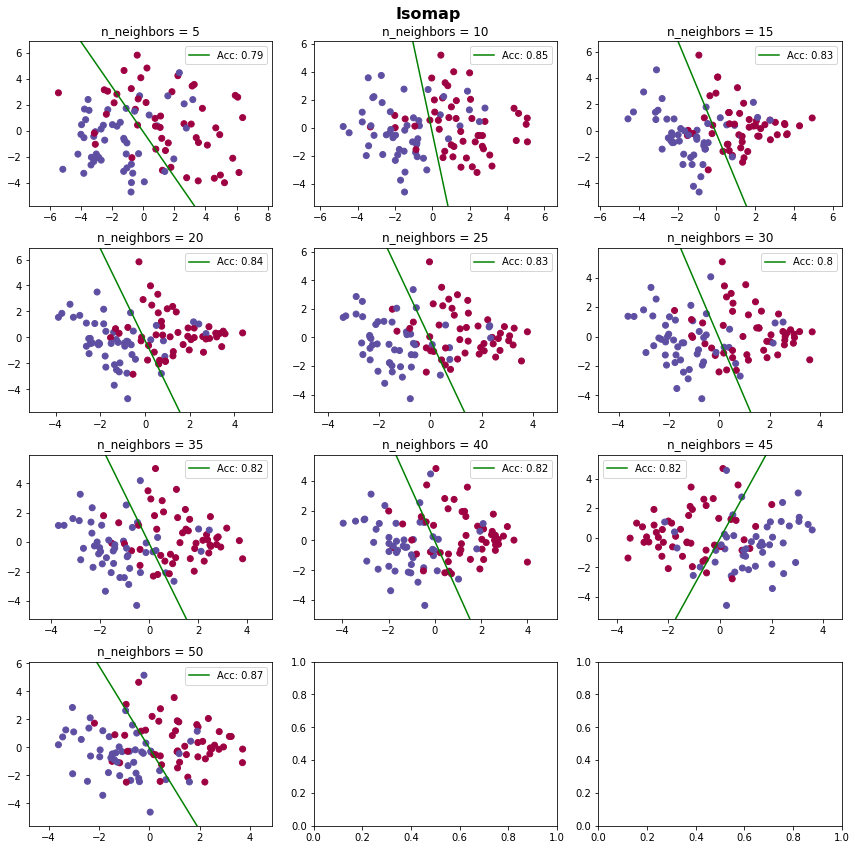

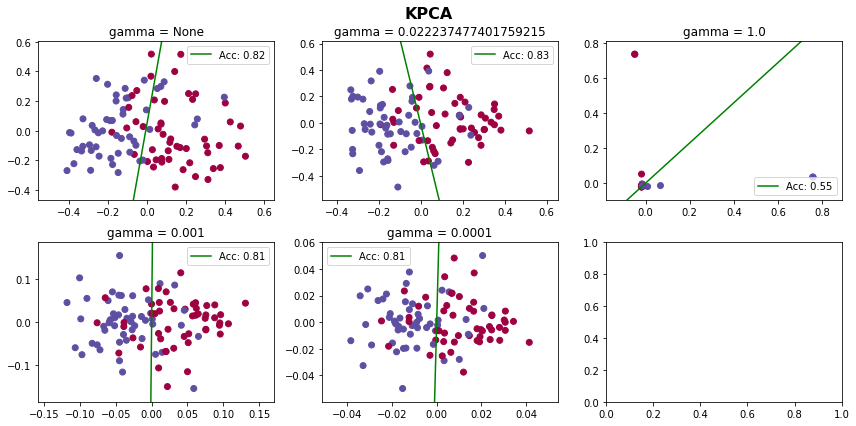


---> Embedding to 3 dimensions <---
-----
[LLE] n_neighbors = 5, acc = 0.66
[LLE] n_neighbors = 5, acc = 0.68
[LLE] n_neighbors = 5, acc = 0.77
[LLE] n_neighbors = 10, acc = 0.61
[LLE] n_neighbors = 10, acc = 0.69
[LLE] n_neighbors = 10, acc = 0.82
[LLE] n_neighbors = 15, acc = 0.61
[LLE] n_neighbors = 15, acc = 0.72
[LLE] n_neighbors = 15, acc = 0.83
[LLE] n_neighbors = 20, acc = 0.76
[LLE] n_neighbors = 20, acc = 0.78
[LLE] n_neighbors = 20, acc = 0.84
[LLE] n_neighbors = 25, acc = 0.67
[LLE] n_neighbors = 25, acc = 0.78
[LLE] n_neighbors = 25, acc = 0.85
[LLE] n_neighbors = 30, acc = 0.72
[LLE] n_neighbors = 30, acc = 0.73
[LLE] n_neighbors = 30, acc = 0.85
[LLE] n_neighbors = 35, acc = 0.68
[LLE] n_neighbors = 35, acc = 0.79
[LLE] n_neighbors = 35, acc = 0.85
[LLE] n_neighbors = 40, acc = 0.78
[LLE] n_neighbors = 40, acc = 0.81
[LLE] n_neighbors = 40, acc = 0.85
[LLE] n_neighbors = 45, acc = 0.81
[LLE] n_neighbors = 45, acc = 0.85
[LLE] n_neighbors = 45, acc = 0.85
[LLE] n_neighbo

In [11]:
from sklearn.manifold import (
    Isomap,
    LocallyLinearEmbedding as LLE
)
from sklearn.decomposition import KernelPCA as KPCA
from sklearn.model_selection import ParameterGrid
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

for dim in [2, 3]:
    print(f"\n---> Embedding to {dim} dimensions <---")

    models = [
        ("LLE",
         Pipeline([
             ("embedding", LLE(n_components=dim)),
             ("clf", LinearSVC(dual=False)),
         ])),
        ("Isomap",
         Pipeline([
             ("embedding", Isomap(n_components=dim)),
             ("clf", LinearSVC(dual=False)),
         ])),
        ("KPCA",
         Pipeline([
             ("embedding", KPCA(n_components=dim, kernel='rbf')),
             ("clf", LinearSVC(dual=False)),
         ]))
    ]

    params = [
        ("n_neighbors",
         {"embedding__n_neighbors": np.linspace(5, 50, 10).astype(int),
          "embedding__reg": np.logspace(-3, -1, 3)}),
        ("n_neighbors",
         {"embedding__n_neighbors": np.linspace(5, 50, 10).astype(int)}),
        ("gamma",
         {"embedding__gamma": [None, 1/(2*(np.median(dist)**2)), 1.0, 0.001, 0.0001]}),
    ]

    for (name, model), (param_name, param_dict) in zip(models, params):
        grid = ParameterGrid(param_dict)
        if dim == 2:
            n_rows = len(grid)//3 + 1 if len(grid) % 3 != 0 else len(grid)//3
            fig, axs = plt.subplots(
                n_rows, 3, figsize=(12, n_rows*3))
        else:
            print("-----")

        for idx, p in enumerate(grid):
            i, j = idx//3, idx % 3

            model.set_params(**p)
            model.fit(X, y)
            acc = model.score(X, y)

            if dim == 2:
                X_red = model['embedding'].fit_transform(X)
                title = f"{param_name} = {p[f'embedding__{param_name}']}"
                plot_embedding(model['clf'], X_red, y, title, axs[i, j])
            else:
                print(
                    f"[{name}] {param_name} = {p[f'embedding__{param_name}']}, acc = {acc}")

        if dim == 2:
            fig.tight_layout()
            fig.suptitle(name, fontsize=16, fontweight="bold")
            fig.subplots_adjust(top=0.9 if n_rows < 3 else 0.94)
            plt.show()

Vemos que en general los métodos consiguen un *accuracy* por encima de 0.8 con los parámetros adecuados, y en las gráficas se observa que algunos de los embeddings son relativamente buenos a la hora de separar las clases, aunque evidentemente ninguno es perfecto.

## MDS

Probamos el algoritmo MDS, que aunque es el más sencillo, en ocasiones puede proporcionar buenos resultados. En este caso no hay parámetros que variar.


---> Embedding to 2 dimensions <---


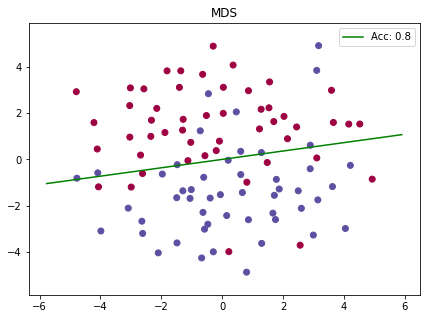


---> Embedding to 3 dimensions <---
[MDS] Acc = 0.84


In [12]:
from sklearn.manifold import MDS

clf = LinearSVC(dual=False)

for dim in [2, 3]:
    print(f"\n---> Embedding to {dim} dimensions <---")
    mds = MDS(n_components=dim, random_state=seed)
    X_red = mds.fit_transform(X)
    clf.fit(X_red, y)

    if dim == 2:
        plot_embedding(clf, X_red, y, "MDS")
        plt.show()
    else:
        acc = clf.score(X_red, y)
        print(f"[MDS] Acc = {acc}")

Obtenemos resultados sorprendentemente buenos, pero se ven superados por algunos de los que obtuvimos arriba.

## LE

No podíamos dejar sin probar el método espectral de Laplacian Eigenmaps. En este caso variamos por separado el número de vecinos como hicimos en otros métodos, y también el parámetro $\sigma$ del kernel RBF.

In [13]:
from sklearn.manifold import SpectralEmbedding as LE

clf = LinearSVC(dual=False)

n_neighbors = np.linspace(5, 50, 10).astype(int)
gamma = [None, 1/(2*(np.median(dist)**2)), 1.0, 0.001, 0.0001]

for dim in [2, 3]:
    print(f"\n---> Embedding to {dim} dimensions <---")
    for k in n_neighbors:
        le = LE(n_components=dim, n_neighbors=k)
        X_red = le.fit_transform(X)
        clf.fit(X_red, y)
        acc = clf.score(X_red, y)
        print(f"[LE] n_neighbors={k}, Acc = {acc}")
    print("------")
    for g in gamma:
        le = LE(n_components=dim, affinity='rbf', gamma=g)
        X_red = le.fit_transform(X)
        clf.fit(X_red, y)
        acc = clf.score(X_red, y)
        print(f"[LE] gamma={g}, Acc = {acc}")


---> Embedding to 2 dimensions <---
[LE] n_neighbors=5, Acc = 0.76
[LE] n_neighbors=10, Acc = 0.79
[LE] n_neighbors=15, Acc = 0.83
[LE] n_neighbors=20, Acc = 0.83
[LE] n_neighbors=25, Acc = 0.86
[LE] n_neighbors=30, Acc = 0.85
[LE] n_neighbors=35, Acc = 0.84
[LE] n_neighbors=40, Acc = 0.81
[LE] n_neighbors=45, Acc = 0.83
[LE] n_neighbors=50, Acc = 0.82
------
[LE] gamma=None, Acc = 0.84
[LE] gamma=0.022237477401759215, Acc = 0.83
[LE] gamma=1.0, Acc = 0.76
[LE] gamma=0.001, Acc = 0.8
[LE] gamma=0.0001, Acc = 0.81

---> Embedding to 3 dimensions <---
[LE] n_neighbors=5, Acc = 0.76
[LE] n_neighbors=10, Acc = 0.81
[LE] n_neighbors=15, Acc = 0.86
[LE] n_neighbors=20, Acc = 0.87
[LE] n_neighbors=25, Acc = 0.85
[LE] n_neighbors=30, Acc = 0.84
[LE] n_neighbors=35, Acc = 0.83
[LE] n_neighbors=40, Acc = 0.85
[LE] n_neighbors=45, Acc = 0.81
[LE] n_neighbors=50, Acc = 0.83
------
[LE] gamma=None, Acc = 0.83
[LE] gamma=0.022237477401759215, Acc = 0.81
[LE] gamma=1.0, Acc = 0.74
[LE] gamma=0.001, 

De nuevo obtenemos resultados buenos, pero ninguno excepcional.

# Diffusion Maps

Finalmente aprovechamos que habíamos implementado el algoritmo de Diffusion Maps en la hoja de ejercicios 3 para probarlo aquí también. Fijamos $\alpha=1$ como parámetro por defecto, para intentar que la densidad de los puntos no sea muy relevante. Fijamos también el kernel RBF, y establecemos $\sigma$ como un percentil de la distancia de los puntos, probando varios valores. Por su parte, el número de pasos en la cadena de Markov también varía, para ver si en este caso tiene algún efecto positivo. 


---> Embedding to 2 dimensions <---


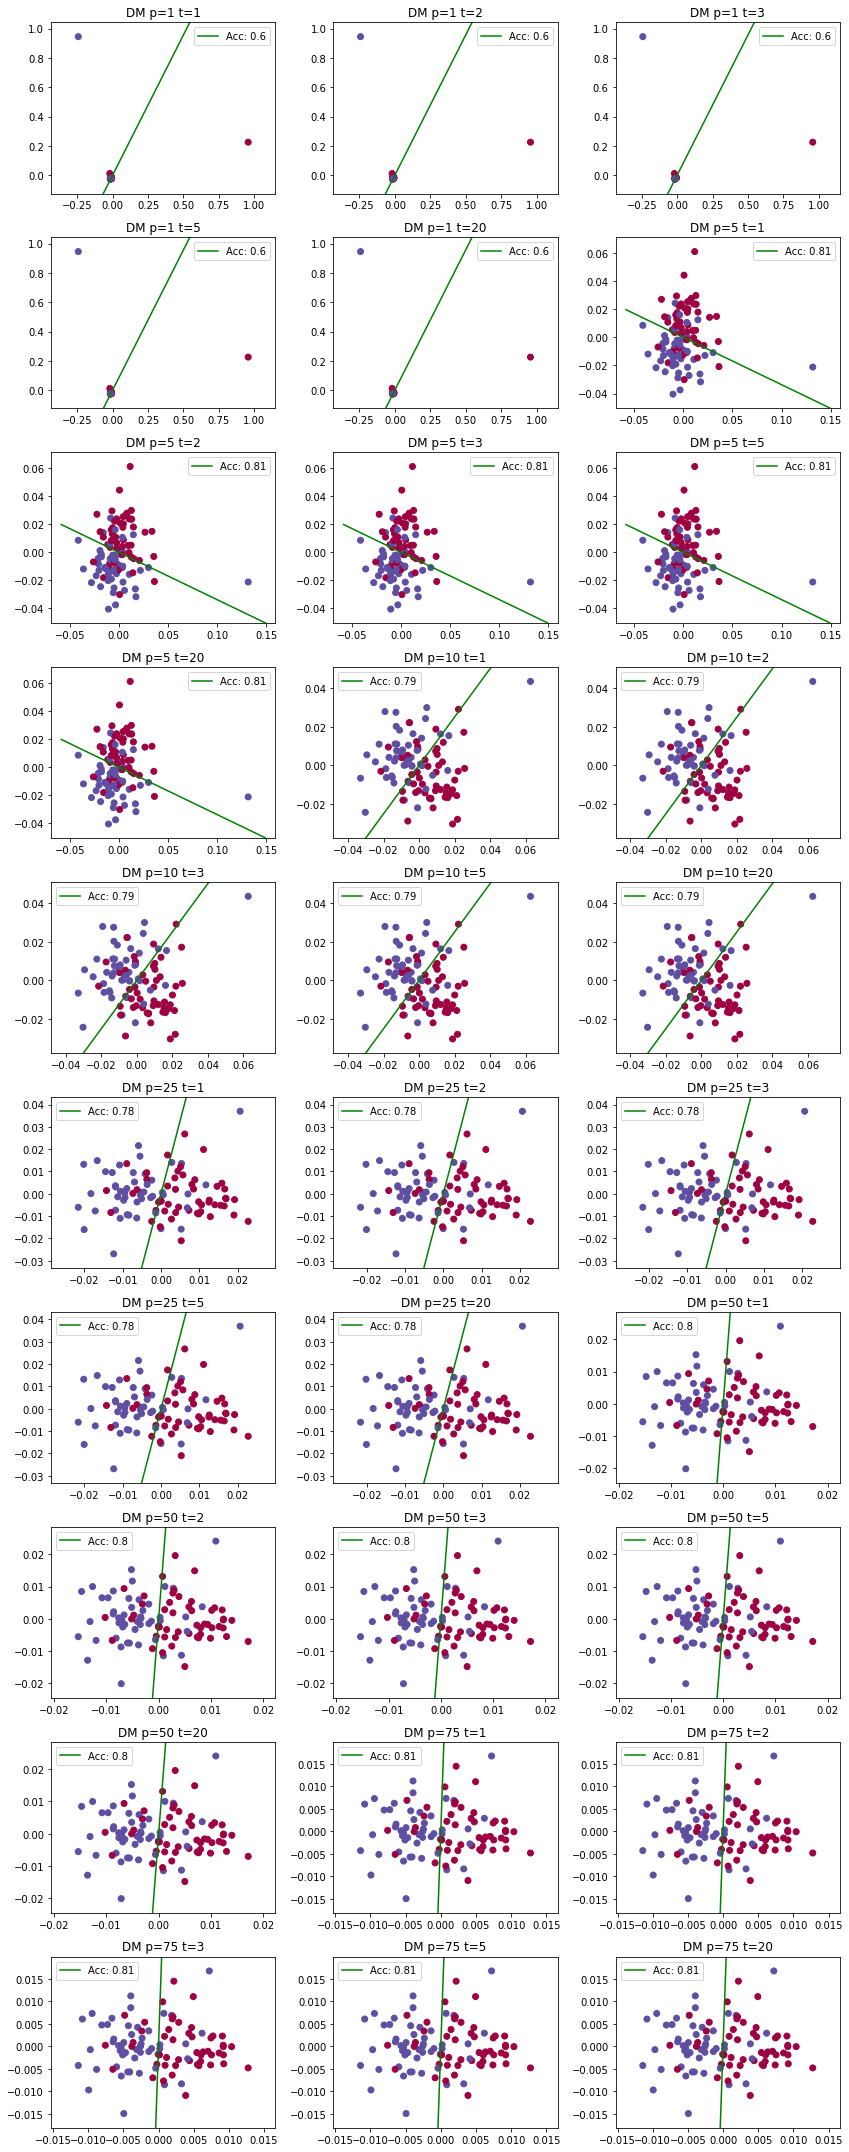


---> Embedding to 3 dimensions <---
[DM] p=1, t=1, Acc=0.51
[DM] p=1, t=2, Acc=0.51
[DM] p=1, t=3, Acc=0.51
[DM] p=1, t=5, Acc=0.51
[DM] p=1, t=20, Acc=0.51
[DM] p=5, t=1, Acc=0.7
[DM] p=5, t=2, Acc=0.7
[DM] p=5, t=3, Acc=0.7
[DM] p=5, t=5, Acc=0.7
[DM] p=5, t=20, Acc=0.7
[DM] p=10, t=1, Acc=0.75
[DM] p=10, t=2, Acc=0.75
[DM] p=10, t=3, Acc=0.75
[DM] p=10, t=5, Acc=0.75
[DM] p=10, t=20, Acc=0.75
[DM] p=25, t=1, Acc=0.8
[DM] p=25, t=2, Acc=0.8
[DM] p=25, t=3, Acc=0.8
[DM] p=25, t=5, Acc=0.8
[DM] p=25, t=20, Acc=0.8
[DM] p=50, t=1, Acc=0.82
[DM] p=50, t=2, Acc=0.82
[DM] p=50, t=3, Acc=0.82
[DM] p=50, t=5, Acc=0.82
[DM] p=50, t=20, Acc=0.82
[DM] p=75, t=1, Acc=0.82
[DM] p=75, t=2, Acc=0.82
[DM] p=75, t=3, Acc=0.82
[DM] p=75, t=5, Acc=0.82
[DM] p=75, t=20, Acc=0.82


In [14]:
from diffusion_maps import DiffusionMaps

clf = LinearSVC(dual=False)

ps = [1, 5, 10, 25, 50, 75]
steps = [1, 2, 3, 5, 20]
alpha = 1
n = len(steps*len(ps))

for dim in [2, 3]:
    if dim == 2:
        n_rows = n//3 + 1 if n % 3 != 0 else n//3
        fig, axs = plt.subplots(n_rows, 3, figsize=(12, n_rows*3))
    print(f"\n---> Embedding to {dim} dimensions <---")

    idx = 0
    for i, p in enumerate(ps):
        for j, t in enumerate(steps):
            ii, jj = idx//3, idx % 3
            idx += 1
            dm = DiffusionMaps(n_components=dim, p=p)
            X_red = dm.fit_transform(X)
            if dim == 3:
                X_red = np.vstack((X_red[:, 0], X_red[:, 2])).T
            clf.fit(X_red, y)
            acc = clf.score(X_red, y)
            if dim == 2:
                plot_embedding(clf, X_red, y, f"DM p={p} t={t}", axs[ii, jj])
            else:
                print(f"[DM] p={p}, t={t}, Acc={acc}")

    if dim == 2:
        fig.tight_layout()
        plt.show()

Obtenemos buenos resultados, pero de nuevo ninguno supera a los que ya teníamos.

## Conclusiones

Una vez que hemos hecho todas las pruebas, escogemos los algoritmos (junto a sus parámetros) que mejores resultados han proporcionado, tanto en 2D como en 3D.

En el caso de 2D, el mejor ha sido Isomap con 50 vecinos, cuyo embedding vemos a continuación.

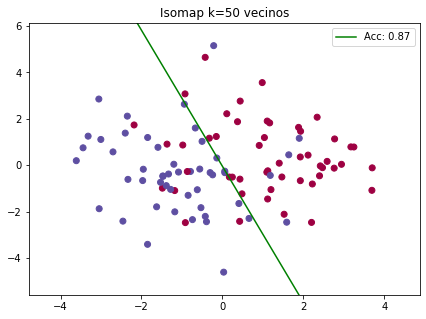

In [15]:
clf = LinearSVC(dual=False)

isomap = Isomap(n_components=2, n_neighbors=50)
X_red = isomap.fit_transform(X)
clf.fit(X_red, y)
plot_embedding(clf, X_red, y, "Isomap k=50 vecinos")
plt.show()

Vemos que las dos clases están más o menos separadas, aunque hay cierto error posiblemente debido a ruido en los datos. Es razonable que este algoritmo funcione bien, ya que trata de mantener la distancia geodésica entre los puntos, y estamos haciendo la hipótesis de que los puntos se encuentran en una subvariedad de dimensión menor a la del espacio original. El hecho de que los mejores resultados se consigan con un número elevado de vecinos puede ser casualidad, en el sentido de que es posible que con un número menor de vecinos se obtuviera un embedding igual o mejor, ya que no hemos probado exhaustivamente todas las posibilidades. Sin embargo, esto también puede ser indicativo de que la geometría intrínseca de los puntos en la (potencial) subvariedad original no es demasiado local, pues se necesitan no pocos vecinos para describirla correctamente.

---

Por su parte, el mejor embedding en 3D obtenido viene dado por el algoritmo de Laplacian Eigenmaps con afinidad dada por los 20 vecinos más cercanos. Lo podemos ver a continuación.

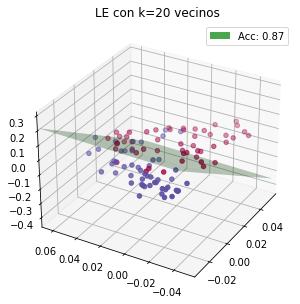

In [23]:
clf = LinearSVC(dual=False)

le = LE(n_components=3, n_neighbors=20)
X_red = le.fit_transform(X)
clf.fit(X_red, y)
acc = clf.score(X_red, y)


def z(x, y): return (-clf.intercept_[0]-clf.coef_[0]
                     [0]*x - clf.coef_[0][1]*y) / clf.coef_[0][2]


xmin, xmax = np.min(X_red[:, 0]), np.max(X_red[:, 0])
ymin, ymax = np.min(X_red[:, 1]), np.max(X_red[:, 1])
delta_x = (xmax - xmin)/10
delta_y = (ymax - ymin)/10

mesh_x = np.linspace(xmin - delta_x, xmax + delta_x, 50)
mesh_y = np.linspace(ymin - delta_y, ymax + delta_y, 50)
xx, yy = np.meshgrid(mesh_x, mesh_y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_red[:, 0], X_red[:, 1], X_red[:, 2], c=y, cmap=my_cmap)
surf = ax.plot_surface(xx, yy, z(xx, yy), alpha=0.3, color="green")
ax.set_xlim(xmin, xmax)
ax.view_init(30, 210)

# Hack to display legend
green_proxy = plt.Rectangle((0, 0), 1, 1, fc="green", alpha=0.7)
ax.legend([green_proxy], [f'Acc: {acc}'])

plt.title("LE con k=20 vecinos")
plt.show()

De nuevo obtenemos un embedding aceptable aunque no perfecto. Este es un método que suele funcionar bien en la práctica, realizando una descomposición espectral de una matriz de afinidad de los puntos. De esta forma también se consigue capturar en cierto modo la geometría de los puntos en la subvariedad original. Podemos decir que este embedding es tan bueno como el que proporciona Isomap en 2D.

# Ejercicio 3 (3 puntos)

Hasta ahora hemos visto cómo trabajar con una matriz de datos que transformamos en un grafo para aplicar un método de reducción de dimensión espectral, pero todos los algoritmos que hemos vistos podrían aplicarse directamente a un *grafo* con cierta información. Para este ejercicio vamos a trabajar con el grafo del *club de karate de Zacarías* (un ejemplo clásico en teoría de grafos).

Para leer los datos necesitaréis instalar la librería *igraph* y *cairo*, para lo que podéis usar los comandos:
<code>
    pip install python-igraph
    pip install pycairo
</code>
Y si os da error porque faltan librerías deberéis instalar:
<code>
    sudo apt install libcairo2-dev
    sudo apt install python3-dev
</code>

<div class="qst">

* Obten la matriz de pesos del grafo a partir de los datos dados.
   
* Aplica alguno de los algoritmos de reducción de dimensión de los vistos en clase de forma que en el embedding se aprecien las dos comunidades existentes en el grafo.

</div>

In [17]:
from igraph import *

g = Graph.Read_GML("karate.gml")
summary(g)

# Información de una arista
print(g.es[0])
# Acceso a la información del primer nodo del grafo
print(g.vs[g.es[0].tuple[0]])
# Acceso a la información del segundo nodo del grafo
print(g.vs[g.es[0].tuple[1]])

IGRAPH U--- 34 78 -- 
+ attr: id (v)
igraph.Edge(<igraph.Graph object at 0x7f18313298b0>, 0, {})
igraph.Vertex(<igraph.Graph object at 0x7f18313298b0>, 0, {'id': 1.0})
igraph.Vertex(<igraph.Graph object at 0x7f18313298b0>, 1, {'id': 2.0})


Antes de nada, podemos pintar el grafo para visualizarlo. Dejamos que el paquete elija el mejor algoritmo de visualización, etiquetamos los nodos por su identificador y lo coloreamos, en principio todo del mismo color porque a priori no conocemos las comunidades.

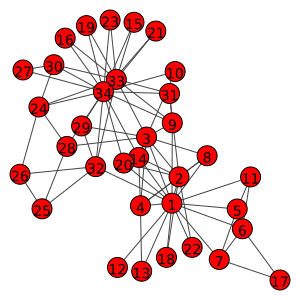

In [18]:
layout = g.layout("auto")
g.vs["label"] = [int(idx) for idx in g.vs["id"]]
plot(g, layout=layout, bbox=(0, 0, 300, 300))

Obtener la matriz de adyacencia es muy sencillo, utilizando la API de la librería `igraph`.

In [19]:
M = np.array(g.get_adjacency().data)

Finalmente, veamos cómo encontrar las dos comunidades del grafo. Puesto que lo que queremos es obtener un etiquetado de los nodos de forma que dividamos el grafo en dos partes diferenciadas, el método de los que hemos estudiado que mejor se ajusta creo que es SpectralClustering, pues si elegimos 2 clústers nos proporcionará (esperemos) la división buscada. Sin muchos más preámbulos, lo probamos a ver qué tal funciona. Podemos especificar directamente la matriz de afinidad con el parámetro `affinity='precomputed'` en Sklearn.

In [24]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(
    n_clusters=2,
    affinity='precomputed',
    random_state=seed,)
labels = sc.fit_predict(M)

Pintemos el grafo utilizando las etiquetas encontradas.

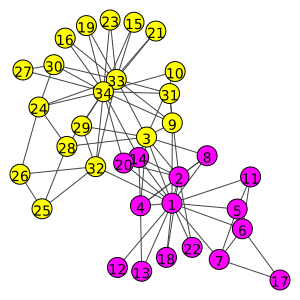

In [25]:
# Plot colored graph
color_dict = {1: "yellow", 0: "magenta"}
g.vs['color'] = [color_dict[l] for l in labels]
plot(g, layout=layout, bbox=(0, 0, 300, 300))

Como vemos, el éxito ha sido rotundo: hemos encontrado dos comunidades en el grafo, y a simple vista podemos verificar que más o menos son acertadas, pues todos los nodos de un mismo color tienen más conexiones con otros de su mismo color que con nodos de otro color.

Una desventaja de este método en Sklearn es que no proporciona explícitamente el embedding utilizado. Sin embargo, sabemos que básicamente el algoritmo se reduce a utilizar un Spectral Embedding seguido de K-means, por lo que intentamos hacer los dos pasos por separado para poder visualizar el embedding. Inspeccionando el [código fuente](https://github.com/scikit-learn/scikit-learn/blob/95119c13a/sklearn/cluster/_spectral.py#L287), vemos que por defecto en Sklearn se mantiene el primer autovalor en lugar de descartarlo a la hora de hacer Spectral Clustering.

In [26]:
from sklearn.manifold import spectral_embedding
from sklearn.cluster import k_means

X_red = spectral_embedding(
    M,
    n_components=2,
    random_state=seed,
    drop_first=False
)

_, labels2, _ = k_means(X_red, n_clusters=2, random_state=seed)

Veamos el embedding obtenido, donde directamente separamos las dos clases que encuentra el algoritmo de K-means por colores.

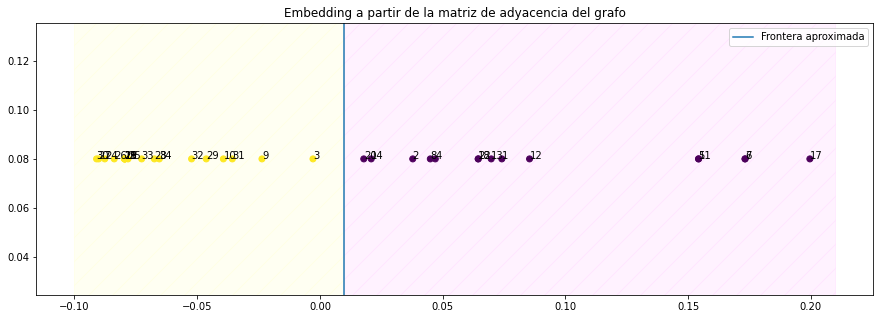

In [28]:
plt.scatter(X_red[:, 1], X_red[:, 0], c=labels2)
plt.axvline(0.01, label="Frontera aproximada")
plt.axvspan(0.01, 0.21, alpha=0.05, color="magenta", hatch="/")
plt.axvspan(-0.1, 0.01, alpha=0.05, color="yellow", hatch="/")
plt.axis('equal')
plt.title("Embedding a partir de la matriz de adyacencia del grafo")
plt.legend()
for i in np.arange(0, X_red.shape[0]):
    delta = 1 if i % 2 == 0 else -1
    plt.annotate(i + 1, (X_red[i, 1], X_red[i, 0]))

Finalmente, comprobamos que estas etiquetas que hemos encontrado haciendo el método "por separado" (dividiéndolo en dos etapas) son las mismas que teníamos antes.

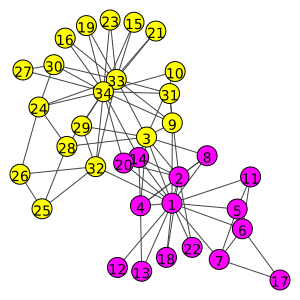

In [22]:
_, labels2, _ = k_means(X_red, n_clusters=2, random_state=seed)
g.vs['color'] = [color_dict[l] for l in labels2]
plot(g, layout=layout, bbox=(0, 0, 300, 300))